In [117]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [144]:
data=pd.read_csv("delivery_time.csv")
data



,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

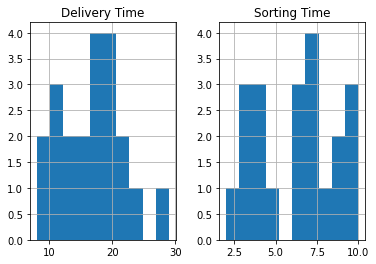

In [119]:
data.info()
data.hist()

In [120]:
data=data.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [121]:
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


C:\Users\MAX\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

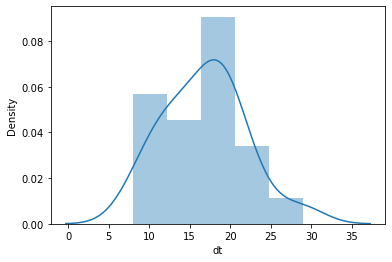

In [123]:
sns.distplot(data['dt'])

C:\Users\MAX\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

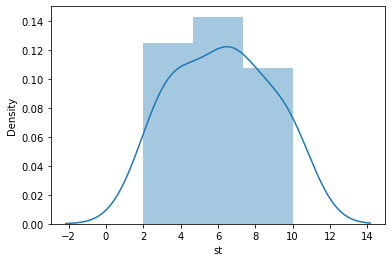

In [124]:
sns.distplot(data['st'])

In [125]:
model1 = smf.ols("dt~st",data =data).fit()

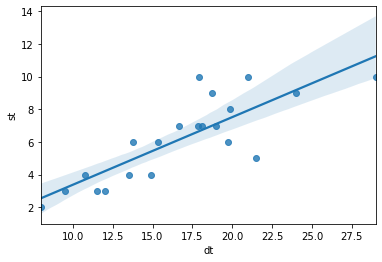

In [65]:
sns.regplot(x="dt", y="st", data=data);

In [66]:
model1.params

Intercept    6.582734
st           1.649020
dtype: float64

In [151]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.98e-06
Time:                        00:07:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
print(model1.tvalues, '\n', model1.pvalues)    

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [77]:
model2=smf.ols("dt~np.log(st)",data =data).fit()

In [78]:
model2.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [149]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.64e-06
Time:                        00:07:01   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
print(model2.tvalues, '\n', model2.pvalues)    

Intercept     0.472460
np.log(st)    6.586789
dtype: float64 
 Intercept     0.641980
np.log(st)    0.000003
dtype: float64


In [81]:
model1.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [83]:
model2.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [133]:
pred1 = model1.predict(data) 
pred2 = model2.predict(data)

Text(0, 0.5, 'Delivery time')

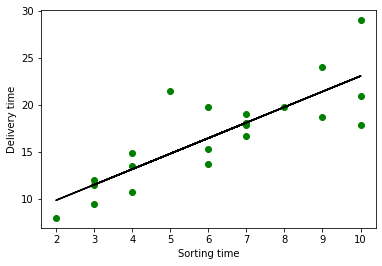

In [134]:
plt.scatter(x=data.st, y=data.dt, color='green')
plt.plot(data.st, pred1,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

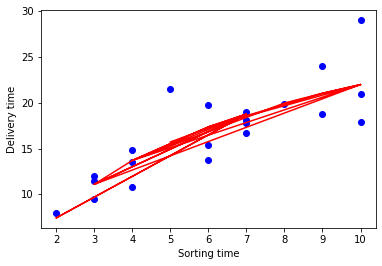

In [135]:
plt.scatter(x=data.st, y=data.dt, color='blue')
plt.plot(data.st, pred2,color='red')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

In [145]:
newdata=pd.Series([20,8])

In [146]:
data_pred=pd.DataFrame(newdata,columns=['st'])

In [147]:
model1.predict(data_pred)

0    39.563132
1    19.774893
dtype: float64

In [148]:
model2.predict(data_pred)

0    28.251329
1    19.964933
dtype: float64